In [1]:
def label_edges_by_curvatures(G):
    for u,v,z in G.edges():  
        p = MixedIntegerLinearProgram()
        f = p.new_variable(real=True)
        p.add_constraint(f[u]==1)
        p.add_constraint(f[v]==0)
        for i,j,z in G.edges():
            p.add_constraint(f[i]-f[j]<=1)
            p.add_constraint(f[j]-f[i]<=1)
        target = 0
        for x in G.neighbors(u):
            target = target + (f[x]-f[u])/G.degree(u)
        for y in G.neighbors(v):
            target = target - (f[y]-f[v])/G.degree(v)
        p.set_objective(target)
        G.set_edge_label(u,v, round(p.solve()*(-1), 2))
    return G

In [2]:
def gen_induct(outer_list):
    new_outer_list = []
    canon_outer = []
    for g in outer_list:
        n = g.order()
        cycle = graphs.CycleGraph(n)
        C = g.subgraph_search(cycle)
        for e in C.edges():
            g.add_edges([[e[0],n], [e[1],n]])
            E = g.canonical_label(algorithm = 'bliss', return_graph = False)
            flag = True
            for F in canon_outer:
                if E == F:
                    flag = False
                    break
            if flag:
                canon_outer.append(E)
                h = g.canonical_label(algorithm = 'bliss')
                new_outer_list.append(h)
            g.delete_vertex(n)
    return new_outer_list   

In [3]:
def LLY_sift(new_outer_list):
    good = False
    for g in new_outer_list:
        if max(g.degree_sequence()) > 9:
            continue
        flag = True
        label_edges_by_curvatures(g)
        for e in g.edges():
            if g.edge_label(e[0],e[1]) <= 0:
                flag = False
                break
        if flag:
            g.show(layout='spring', edge_labels = True)
            good = True
    if not good:
        print('\nNo positive LLY graphs found!\n')

-------

Vertices: 3
Number of triangulations: 1


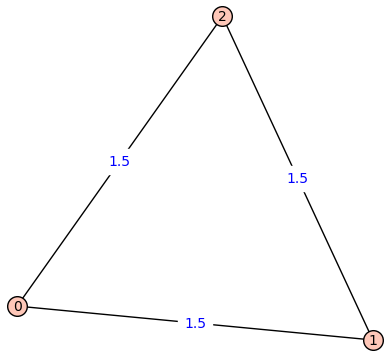

Time elapsed: ~0.3 seconds

-------

Vertices: 4
Number of triangulations: 1


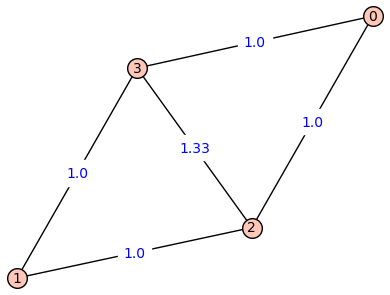

Time elapsed: ~0.0 seconds

-------

Vertices: 5
Number of triangulations: 1


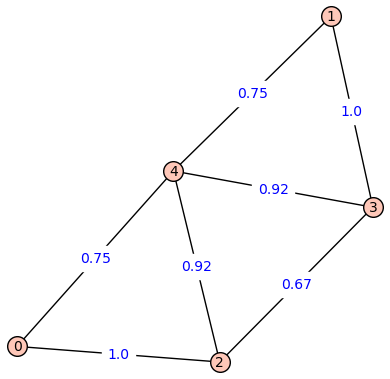

Time elapsed: ~0.0 seconds

-------

Vertices: 6
Number of triangulations: 3


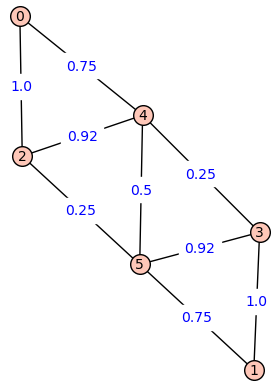

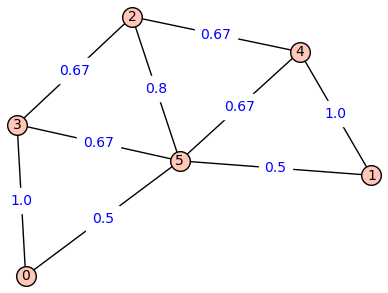

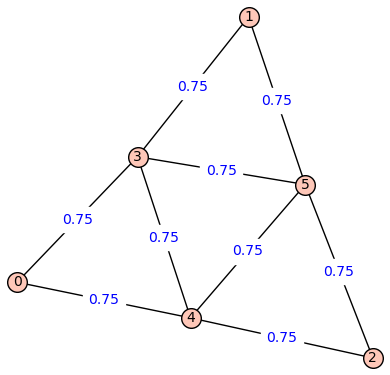

Time elapsed: ~0.1 seconds

-------

Vertices: 7
Number of triangulations: 4


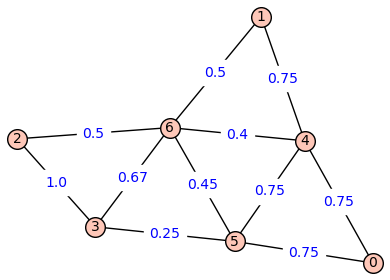

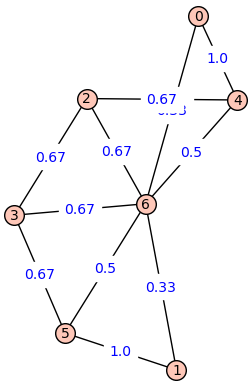

Time elapsed: ~0.1 seconds

-------

Vertices: 8
Number of triangulations: 12


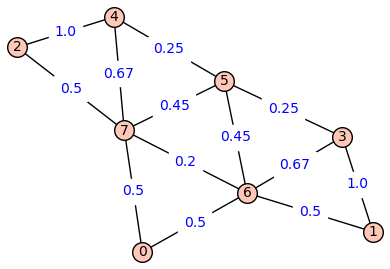

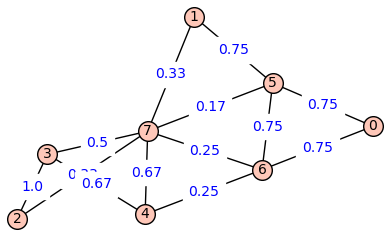

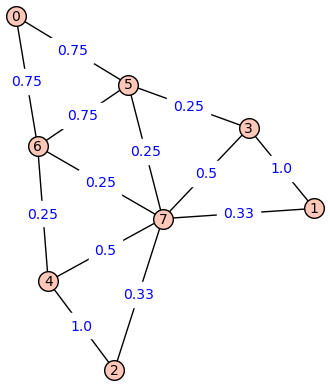

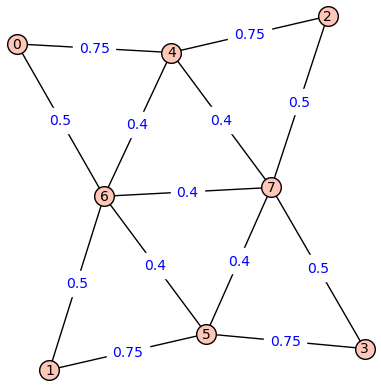

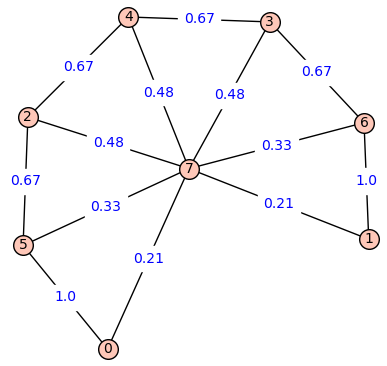

Time elapsed: ~0.4 seconds

-------

Vertices: 9
Number of triangulations: 27


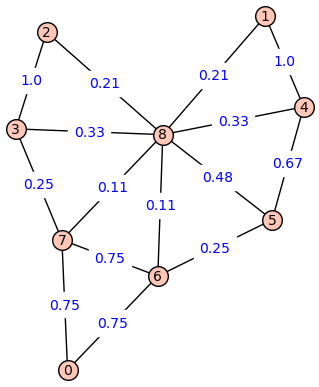

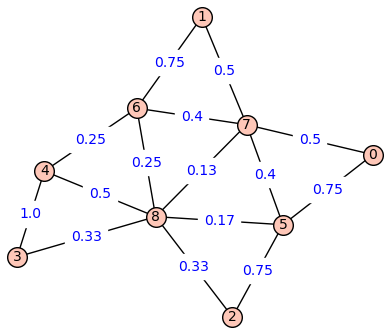

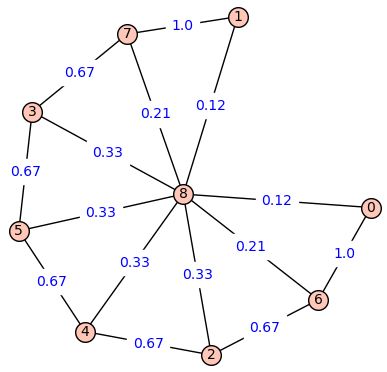

Time elapsed: ~0.4 seconds

-------

Vertices: 10
Number of triangulations: 82


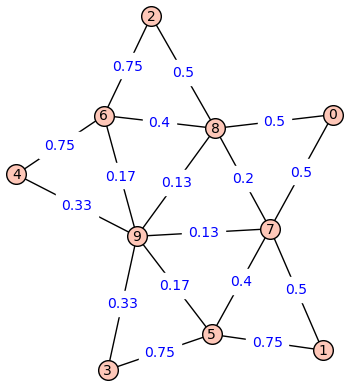

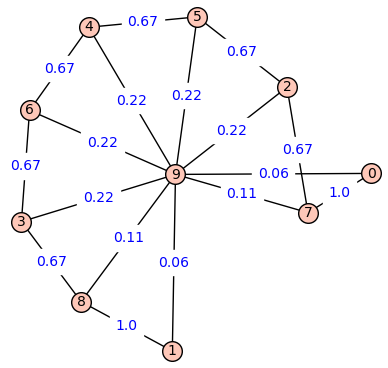

Time elapsed: ~1.0 seconds

-------

Vertices: 11
Number of triangulations: 228

No positive LLY graphs found!

Time elapsed: ~3.0 seconds



In [4]:
import time

outer_list = [graphs.CompleteGraph(2)]

for i in range(3, 12):
    
    start_time = time.time()
    
    
    new_outer_list = gen_induct(outer_list)
    
    
    print('-------')
    print('\nVertices: '+str(i))
    print('Number of triangulations: ' + str(len(new_outer_list)))
    
    
    LLY_sift(new_outer_list)
    outer_list = new_outer_list
    save([g.graph6_string() for g in outer_list], 'C_' + str(i).zfill(2) +'_triangulations')
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time < 60:
        print('Time elapsed: ~' + str(round(elapsed_time,1)) + ' seconds\n')
    elif elapsed_time < (60*60):
        print('Time elapsed: ~' + str(round(elapsed_time/60,1)) + ' minutes\n')
    elif elapsed_time < (60*60*24):
        print('Time elapsed: ~' + str(round(elapsed_time/(60*60),1)) + ' hours\n')
    elif elapsed_time < (60*60*24*365):
        print('Time elapsed: ~' + str(round(elapsed_time/(60*60*24),1)) + ' days\n')